In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
#stocks = ["WBD","NVDA","MSFT","UBER","INTC","AMD","AMZN","GOOG","ASML","TSLA"]
stocks = ["WBD","NVDA","MSFT","UBER","AAPL","AMD","AMZN","GOOG","ASML","TSLA"]

In [3]:
data = yf.download(stocks, start="2022-03-10", end="2024-08-10", interval="3mo")

[*********************100%***********************]  10 of 10 completed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-03-01 00:00:00+00:00 to 2024-06-01 00:00:00+00:00
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  10 non-null     float64
 1   (Adj Close, AMD)   10 non-null     float64
 2   (Adj Close, AMZN)  10 non-null     float64
 3   (Adj Close, ASML)  10 non-null     float64
 4   (Adj Close, GOOG)  10 non-null     float64
 5   (Adj Close, MSFT)  10 non-null     float64
 6   (Adj Close, NVDA)  10 non-null     float64
 7   (Adj Close, TSLA)  10 non-null     float64
 8   (Adj Close, UBER)  10 non-null     float64
 9   (Adj Close, WBD)   10 non-null     float64
 10  (Close, AAPL)      10 non-null     float64
 11  (Close, AMD)       10 non-null     float64
 12  (Close, AMZN)      10 non-null     float64
 13  (Close, ASML)      10 non-null     float64
 14  (Close, GOOG)      10 non-null     float64
 15  (Close, MSFT)      10 non-

In [5]:
df = data['High']
df.head()

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
Date,,,,,,,,,,
2022-03-01 00:00:00+00:00,178.490005,111.419998,168.394501,681.539978,144.043747,315.109985,27.558001,384.290009,36.930000,27.50
2022-06-01 00:00:00+00:00,176.149994,109.570000,146.570007,592.750000,123.260002,294.179993,19.618999,314.666656,33.360001,18.74
2022-09-01 00:00:00+00:00,164.259995,85.680000,136.490005,610.000000,112.639999,267.450012,16.997999,313.799988,34.325001,13.83
2022-12-01 00:00:00+00:00,157.380005,88.940002,114.000000,698.590027,108.820000,276.760010,23.888000,217.649994,37.580002,16.34
2023-03-01 00:00:00+00:00,179.350006,130.789993,122.919998,747.130005,127.050003,335.940002,41.938000,207.789993,40.500000,15.85


In [6]:
df.info()
df = pd.DataFrame(df)
# Drop the 'Date' indexing
df.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2022-03-01 00:00:00+00:00 to 2024-06-01 00:00:00+00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    10 non-null     float64
 1   AMD     10 non-null     float64
 2   AMZN    10 non-null     float64
 3   ASML    10 non-null     float64
 4   GOOG    10 non-null     float64
 5   MSFT    10 non-null     float64
 6   NVDA    10 non-null     float64
 7   TSLA    10 non-null     float64
 8   UBER    10 non-null     float64
 9   WBD     10 non-null     float64
dtypes: float64(10)
memory usage: 880.0 bytes


In [7]:
df
df.columns

Index(['AAPL', 'AMD', 'AMZN', 'ASML', 'GOOG', 'MSFT', 'NVDA', 'TSLA', 'UBER',
       'WBD'],
      dtype='object', name='Ticker')

In [8]:
variables = df.columns
#variables = ['AAPL', 'AMZN', 'BA', 'BAC', 'META', 'NVDA', 'PFE', 'TSLA', 'UBER','WBD']
variables

Index(['AAPL', 'AMD', 'AMZN', 'ASML', 'GOOG', 'MSFT', 'NVDA', 'TSLA', 'UBER',
       'WBD'],
      dtype='object', name='Ticker')

In [9]:
# Round to 2 significant figures

def round_to_2SigFig(x):
    if x == 0:
        return 0
    else:
        return float(f'{x:.2g}')

# A = df.map(round_to_2SigFig)
# Roud to 1 decimal place

A = df.round(1)

In [10]:
A

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
0,178.5,111.4,168.4,681.5,144.0,315.1,27.6,384.3,36.9,27.5
1,176.1,109.6,146.6,592.8,123.3,294.2,19.6,314.7,33.4,18.7
2,164.3,85.7,136.5,610.0,112.6,267.5,17.0,313.8,34.3,13.8
3,157.4,88.9,114.0,698.6,108.8,276.8,23.9,217.6,37.6,16.3
4,179.4,130.8,122.9,747.1,127.1,335.9,41.9,207.8,40.5,15.9
5,198.2,132.8,143.6,772.0,138.4,366.8,50.3,299.3,49.5,14.8
6,192.9,125.7,149.3,697.0,142.4,384.3,50.5,279.0,57.1,12.8
7,199.6,193.0,177.2,959.5,155.2,420.8,82.4,265.1,81.9,12.7
8,193.0,227.3,191.7,1056.3,179.9,433.6,115.8,204.5,82.1,9.3
9,237.2,187.3,201.2,1110.1,193.3,468.4,140.8,271.0,75.4,8.9


## **Data Standardisation**

In [11]:
mean_col = A.mean()
std_col = A.std()

In [12]:
# Display the mean and standard deviation in a tabular form
summary_df = pd.DataFrame({
    'Mean': mean_col,
    'Standard Deviation': std_col
})

summary_df = (summary_df.T).round(1)

print("Mean and Standard Deviation in tabular form (transposed):")
print(summary_df)
# Save DataFrame to CSV
summary_df.to_csv('summary_statistics.csv')

# Download the CSV file
files.download('summary_statistics.csv')

Mean and Standard Deviation in tabular form (transposed):
Ticker               AAPL    AMD   AMZN   ASML   GOOG   MSFT  NVDA   TSLA  \
Mean                187.7  139.2  155.1  792.5  142.5  356.3  57.0  275.7   
Standard Deviation   22.4   47.5   28.8  183.9   27.5   69.7  42.7   56.3   

Ticker              UBER   WBD  
Mean                52.9  15.1  
Standard Deviation  20.0   5.3  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
A_standardised = (A - mean_col) / std_col

In [14]:
A_standardised

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
0,-0.409150,-0.586338,0.461182,-0.603631,0.054590,-0.591347,-0.688281,1.928872,-0.798595,2.341161
1,-0.516350,-0.624234,-0.297021,-1.086036,-0.698746,-0.891035,-0.875695,0.692575,-0.973616,0.683702
2,-1.043421,-1.127410,-0.648298,-0.992492,-1.088152,-1.273891,-0.936605,0.676588,-0.928611,-0.239201
3,-1.351623,-1.060039,-1.430847,-0.510631,-1.226445,-1.140537,-0.774960,-1.032201,-0.763591,0.231668
4,-0.368949,-0.177901,-1.121305,-0.246858,-0.560453,-0.293092,-0.353277,-1.206278,-0.618574,0.156329
5,0.470790,-0.135795,-0.401361,-0.111437,-0.149211,0.149988,-0.156491,0.419026,-0.168520,-0.050854
6,0.234055,-0.285274,-0.203115,-0.519333,-0.003639,0.400923,-0.151806,0.058440,0.211525,-0.427549
7,0.533324,1.131621,0.767245,0.908302,0.462191,0.924302,0.595510,-0.188464,1.451673,-0.446384
8,0.238522,1.853753,1.271555,1.434759,1.361099,1.107843,1.377967,-1.264895,1.461674,-1.086766
9,2.212802,1.011616,1.601964,1.727357,1.848766,1.606846,1.963638,-0.083663,1.126634,-1.162105


In [15]:
# Save DataFrame to CSV
(A_standardised.map(round_to_2SigFig)).to_csv('A_std.csv')
# df.map(round_to_2SigFig)
# Download the CSV file
files.download('A_std.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Covariance Matrix Calculation**

In [16]:
n = len(A_standardised)
C = (1/(n-1)) * (A_standardised.T).dot(A_standardised)

In [17]:
C

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
Ticker,,,,,,,,,,
AAPL,1.000000,0.710054,0.778845,0.788835,0.881037,0.906470,0.863450,-0.043219,0.738306,-0.513882
AMD,0.710054,1.000000,0.813393,0.926030,0.885385,0.910077,0.907754,-0.414844,0.944112,-0.596630
AMZN,0.778845,0.813393,1.000000,0.792633,0.936563,0.814300,0.833693,0.111966,0.790109,-0.328204
ASML,0.788835,0.926030,0.792633,1.000000,0.906129,0.913714,0.976126,-0.441190,0.919381,-0.646618
GOOG,0.881037,0.885385,0.936563,0.906129,1.000000,0.935724,0.949658,-0.133226,0.855340,-0.476246
MSFT,0.906470,0.910077,0.814300,0.913714,0.935724,1.000000,0.946196,-0.301387,0.933986,-0.629099
NVDA,0.863450,0.907754,0.833693,0.976126,0.949658,0.946196,1.000000,-0.381741,0.907495,-0.688140
TSLA,-0.043219,-0.414844,0.111966,-0.441190,-0.133226,-0.301387,-0.381741,1.000000,-0.398177,0.656608
UBER,0.738306,0.944112,0.790109,0.919381,0.855340,0.933986,0.907495,-0.398177,1.000000,-0.690491


In [18]:
# Validation of results
C_test = A_standardised.cov()
C_test

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
Ticker,,,,,,,,,,
AAPL,1.000000,0.710054,0.778845,0.788835,0.881037,0.906470,0.863450,-0.043219,0.738306,-0.513882
AMD,0.710054,1.000000,0.813393,0.926030,0.885385,0.910077,0.907754,-0.414844,0.944112,-0.596630
AMZN,0.778845,0.813393,1.000000,0.792633,0.936563,0.814300,0.833693,0.111966,0.790109,-0.328204
ASML,0.788835,0.926030,0.792633,1.000000,0.906129,0.913714,0.976126,-0.441190,0.919381,-0.646618
GOOG,0.881037,0.885385,0.936563,0.906129,1.000000,0.935724,0.949658,-0.133226,0.855340,-0.476246
MSFT,0.906470,0.910077,0.814300,0.913714,0.935724,1.000000,0.946196,-0.301387,0.933986,-0.629099
NVDA,0.863450,0.907754,0.833693,0.976126,0.949658,0.946196,1.000000,-0.381741,0.907495,-0.688140
TSLA,-0.043219,-0.414844,0.111966,-0.441190,-0.133226,-0.301387,-0.381741,1.000000,-0.398177,0.656608
UBER,0.738306,0.944112,0.790109,0.919381,0.855340,0.933986,0.907495,-0.398177,1.000000,-0.690491


In [19]:
C_test.round(4) == C.round(4)

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
Ticker,,,,,,,,,,
AAPL,True,True,True,True,True,True,True,True,True,True
AMD,True,True,True,True,True,True,True,True,True,True
AMZN,True,True,True,True,True,True,True,True,True,True
ASML,True,True,True,True,True,True,True,True,True,True
GOOG,True,True,True,True,True,True,True,True,True,True
MSFT,True,True,True,True,True,True,True,True,True,True
NVDA,True,True,True,True,True,True,True,True,True,True
TSLA,True,True,True,True,True,True,True,True,True,True
UBER,True,True,True,True,True,True,True,True,True,True


In [20]:
#(C.map(round_to_2SigFig)).to_csv('COVAR.csv')
#files.download('COVAR.csv')
print((C.map(round_to_2SigFig)))

Ticker   AAPL   AMD  AMZN  ASML  GOOG  MSFT  NVDA   TSLA  UBER   WBD
Ticker                                                              
AAPL    1.000  0.71  0.78  0.79  0.88  0.91  0.86 -0.043  0.74 -0.51
AMD     0.710  1.00  0.81  0.93  0.89  0.91  0.91 -0.410  0.94 -0.60
AMZN    0.780  0.81  1.00  0.79  0.94  0.81  0.83  0.110  0.79 -0.33
ASML    0.790  0.93  0.79  1.00  0.91  0.91  0.98 -0.440  0.92 -0.65
GOOG    0.880  0.89  0.94  0.91  1.00  0.94  0.95 -0.130  0.86 -0.48
MSFT    0.910  0.91  0.81  0.91  0.94  1.00  0.95 -0.300  0.93 -0.63
NVDA    0.860  0.91  0.83  0.98  0.95  0.95  1.00 -0.380  0.91 -0.69
TSLA   -0.043 -0.41  0.11 -0.44 -0.13 -0.30 -0.38  1.000 -0.40  0.66
UBER    0.740  0.94  0.79  0.92  0.86  0.93  0.91 -0.400  1.00 -0.69
WBD    -0.510 -0.60 -0.33 -0.65 -0.48 -0.63 -0.69  0.660 -0.69  1.00


## **Eigenvalue and Eigenvector Calculation**

In [21]:
# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)
eigenvalues, eigenvectors

(array([7.64235140e+00, 1.50693818e+00, 4.01640185e-01, 2.22295811e-01,
        1.31111242e-01, 5.48746119e-02, 3.11147335e-02, 9.56366154e-03,
        1.39326546e-16, 1.10179046e-04]),
 array([[ 0.31281529,  0.22110282, -0.56385161,  0.43560564, -0.18381205,
         -0.00833288, -0.29289281,  0.39884738,  0.20538588, -0.15707999],
        [ 0.34234079, -0.04148786,  0.41072359, -0.13482829, -0.24319324,
         -0.3922447 , -0.66030579, -0.1383877 , -0.07782617, -0.14141549],
        [ 0.30800247,  0.3764641 ,  0.18448785, -0.35376131,  0.33865353,
         -0.17072844,  0.10042497,  0.55803994,  0.02259413,  0.37200506],
        [ 0.3500556 , -0.06074254,  0.1765671 ,  0.18352341,  0.28836492,
          0.66065495, -0.28535774, -0.23924446,  0.21658238,  0.32205663],
        [ 0.34385161,  0.21287007,  0.06960256,  0.15288962,  0.25070723,
         -0.34494676,  0.38040966, -0.42243888,  0.47776458, -0.27379766],
        [ 0.35270224,  0.0456365 , -0.10373593,  0.17178319, -0.48388

In [22]:
sorted_sequence = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_sequence]
sorted_eigenvectors = eigenvectors[:, sorted_sequence]

In [23]:
sorted_variables = [variables[i] for i in sorted_sequence]

sorted_variables

['AAPL', 'AMD', 'AMZN', 'ASML', 'GOOG', 'MSFT', 'NVDA', 'TSLA', 'WBD', 'UBER']

In [24]:
eigenvalues_df = pd.DataFrame(sorted_eigenvalues, columns=["Eigenvalue"], index=sorted_variables)
eigenvalues_df

,Eigenvalue
AAPL,7.642351e+00
AMD,1.506938e+00
AMZN,4.016402e-01
ASML,2.222958e-01
GOOG,1.311112e-01
MSFT,5.487461e-02
NVDA,3.111473e-02
TSLA,9.563662e-03
WBD,1.101790e-04
UBER,1.393265e-16


In [25]:
eigenvectors_df = pd.DataFrame(sorted_eigenvectors, columns=variables, index=variables)
eigenvectors_df

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
Ticker,,,,,,,,,,
AAPL,0.312815,0.221103,-0.563852,0.435606,-0.183812,-0.008333,-0.292893,0.398847,-0.157080,0.205386
AMD,0.342341,-0.041488,0.410724,-0.134828,-0.243193,-0.392245,-0.660306,-0.138388,-0.141415,-0.077826
AMZN,0.308002,0.376464,0.184488,-0.353761,0.338654,-0.170728,0.100425,0.558040,0.372005,0.022594
ASML,0.350056,-0.060743,0.176567,0.183523,0.288365,0.660655,-0.285358,-0.239244,0.322057,0.216582
GOOG,0.343852,0.212870,0.069603,0.152890,0.250707,-0.344947,0.380410,-0.422439,-0.273798,0.477765
MSFT,0.352702,0.045637,-0.103736,0.171783,-0.483880,-0.136045,0.305074,-0.257310,0.576419,-0.298432
NVDA,0.357225,-0.014493,-0.044670,0.146493,0.370889,0.090009,0.109796,-0.012337,-0.382273,-0.738054
TSLA,-0.130089,0.732764,-0.254067,-0.369173,-0.073182,0.201320,-0.178104,-0.381483,-0.071628,-0.130495
UBER,0.344774,-0.068159,0.165417,-0.363013,-0.485628,0.426067,0.312131,0.190432,-0.384304,0.136369


In [26]:
(eigenvalues_df.map(round_to_2SigFig)).to_csv('eigenvalues_df.csv')
files.download('eigenvalues_df.csv')
(eigenvectors_df.map(round_to_2SigFig)).to_csv('eigenvectors_df.csv')
files.download('eigenvectors_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Principal Components and Projection**

In [27]:
  # Use the sorted eigenvectors for projection
Z = A_standardised.dot(eigenvectors_df)
Z

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
0,-1.940541,2.691597,0.804514,0.273202,0.062710,0.068479,0.103144,-0.049380,0.003929,4.806868e-15
1,-2.309575,0.579882,-0.068024,-0.156712,0.061165,-0.332242,-0.157494,0.171488,-0.011230,-1.510071e-14
2,-2.766359,-0.195685,-0.536023,-0.819400,0.401667,0.083759,-0.068612,-0.059350,0.012681,1.722202e-14
3,-2.692421,-1.661355,0.310918,0.252841,0.235377,0.335529,0.164107,0.038510,-0.011953,-1.810805e-14
4,-1.125497,-1.378196,0.186812,0.781032,-0.109484,-0.186107,-0.122542,-0.004844,0.017039,2.418441e-14
5,-0.216155,0.237714,-0.597837,0.204007,-0.329116,0.068027,-0.216615,-0.164603,-0.013797,-1.805882e-14
6,-0.011511,-0.131353,-0.642037,-0.165892,-0.472163,-0.211911,0.369940,-0.007650,0.001292,2.056255e-16
7,2.441886,-0.007343,0.403923,-0.406430,-0.571485,0.319255,-0.114897,0.102188,0.005805,8.538198e-15
8,3.892143,-0.842455,0.963790,-0.382002,0.247543,-0.249350,0.017496,-0.088197,-0.005290,-7.357036e-15
9,4.728030,0.707195,-0.826036,0.419354,0.473786,0.104560,0.025473,0.061837,0.001525,3.136881e-15


In [28]:
(Z.map(round_to_2SigFig)).to_csv('Z.csv')
files.download('Z.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Variance explained by the principal component**

In [29]:
total_variance = eigenvalues_df.sum()

variance_explained = eigenvalues_df/total_variance

variance_explained = variance_explained.rename(columns={"Eigenvalue": "Proportion"})

variance_explained

,Proportion
AAPL,7.642351e-01
AMD,1.506938e-01
AMZN,4.016402e-02
ASML,2.222958e-02
GOOG,1.311112e-02
MSFT,5.487461e-03
NVDA,3.111473e-03
TSLA,9.563662e-04
WBD,1.101790e-05
UBER,1.393265e-17


In [30]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained = cumulative_variance_explained.rename(columns={"Proportion": "Cumulative"})
cumulative_variance_explained

,Cumulative
AAPL,0.764235
AMD,0.914929
AMZN,0.955093
ASML,0.977323
GOOG,0.990434
MSFT,0.995921
NVDA,0.999033
TSLA,0.999989
WBD,1.000000
UBER,1.000000


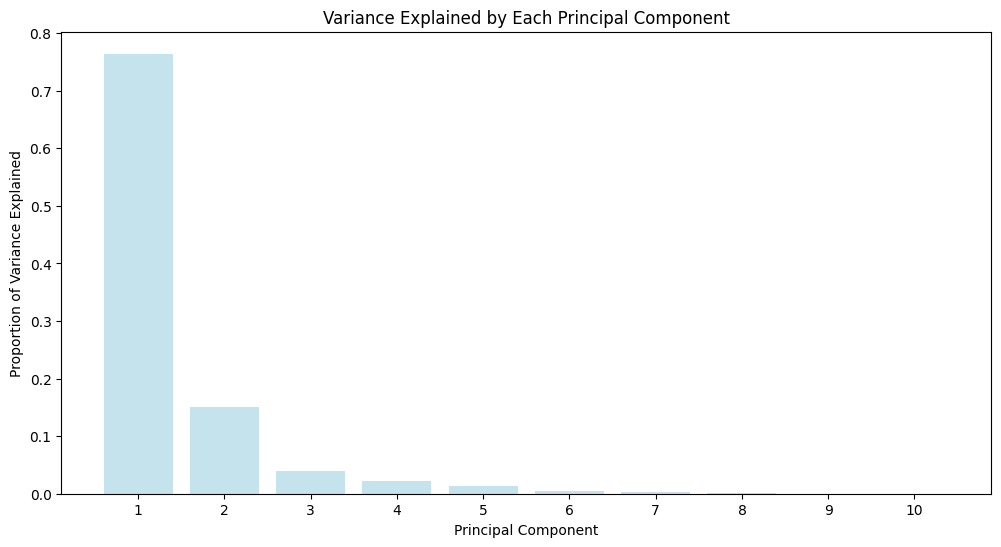

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [31]:
# Plot explained variance
plt.figure(figsize=(12, 6))

plt.bar(range(1, len(variance_explained) + 1), variance_explained['Proportion'],color = 'lightblue', alpha=0.7)
plt.title('Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(variance_explained) + 1))

plt.show()

# Save the plot as a PNG file
plt.savefig('Variance_Explained.png')
# Download the file to your local machine
files.download('Variance_Explained.png')

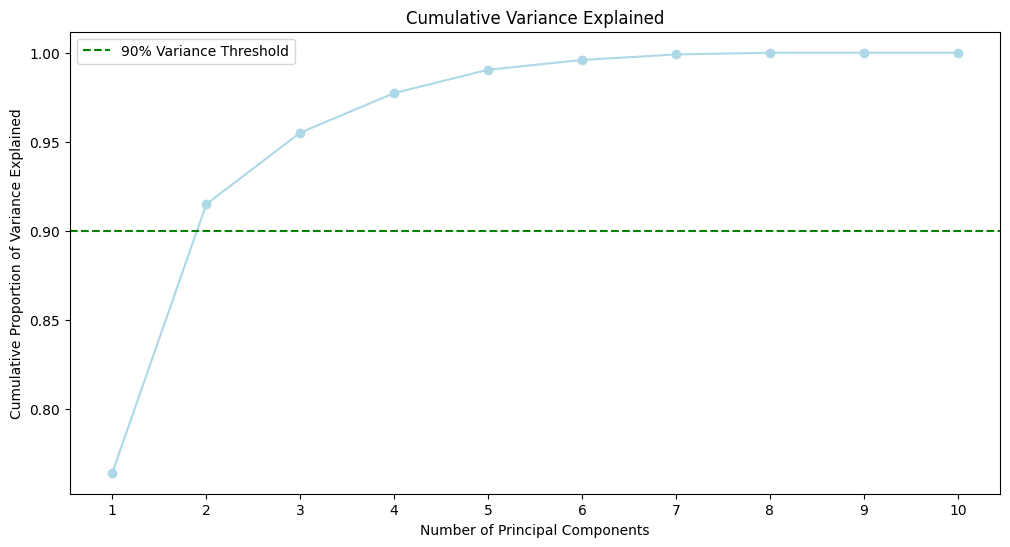

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [32]:
# Plot cumulative variance explained
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained['Cumulative'] ,color = 'lightblue', marker='o')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.xticks(range(1, len(cumulative_variance_explained) + 1))
plt.legend()
plt.show()

# Save the plot as a PNG file
plt.savefig('Cumulative_Variance_Explained.png')
# Download the file to your local machine
files.download('Cumulative_Variance_Explained.png')

## **Dimensionality Reduction and Reconstruction**

In [33]:
n_components = np.argmax(cumulative_variance_explained['Cumulative'] >= 0.9) + 1
n_components

2

In [34]:
# Only taking minimum components
Z_reduced = Z.iloc[:, :n_components]

# Corresponding eigenvectors of minimum components
V_reduced = eigenvectors_df.iloc[:, :n_components]

In [35]:
Z_reduced

Ticker,AAPL,AMD
0,-1.940541,2.691597
1,-2.309575,0.579882
2,-2.766359,-0.195685
3,-2.692421,-1.661355
4,-1.125497,-1.378196
5,-0.216155,0.237714
6,-0.011511,-0.131353
7,2.441886,-0.007343
8,3.892143,-0.842455
9,4.728030,0.707195


In [36]:
V_reduced

Ticker,AAPL,AMD
Ticker,,
AAPL,0.312815,0.221103
AMD,0.342341,-0.041488
AMZN,0.308002,0.376464
ASML,0.350056,-0.060743
GOOG,0.343852,0.212870
MSFT,0.352702,0.045637
NVDA,0.357225,-0.014493
TSLA,-0.130089,0.732764
UBER,0.344774,-0.068159


In [37]:
(V_reduced.map(round_to_2SigFig)).to_csv('V_reduced.csv')
files.download('V_reduced.csv')
(Z_reduced.map(round_to_2SigFig)).to_csv('Z_reduced.csv')
files.download('Z_reduced.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
A_reconstructed =Z_reduced.dot(V_reduced.T)
A_reconstructed

Ticker,AAPL,AMD,AMZN,ASML,GOOG,MSFT,NVDA,TSLA,UBER,WBD
0,-0.011911,-0.775995,0.415598,-0.842792,-0.094298,-0.561598,-0.732219,2.224748,-0.852504,1.728690
1,-0.594257,-0.814720,-0.493050,-0.843703,-0.670712,-0.788128,-0.833442,0.725367,-0.835805,0.841547
2,-0.908626,-0.938919,-0.925714,-0.956493,-0.992873,-0.984632,-0.985377,0.216482,-0.940431,0.595402
3,-1.209561,-0.852800,-1.454713,-0.841582,-1.279446,-1.025441,-0.937722,-0.867126,-0.815040,-0.102196
4,-0.656796,-0.328125,-0.865497,-0.310271,-0.680381,-0.459861,-0.382082,-0.863477,-0.294106,-0.359583
5,-0.015057,-0.083861,0.022914,-0.090106,-0.023723,-0.065390,-0.080661,0.202307,-0.090727,0.163777
6,-0.032643,0.001509,-0.052995,0.003949,-0.031919,-0.010054,-0.002208,-0.094753,0.004984,-0.058020
7,0.762236,0.836262,0.749343,0.855242,0.838083,0.860924,0.872410,-0.323043,0.842399,-0.609021
8,1.031253,1.367391,0.881635,1.413639,1.158986,1.334321,1.402581,-1.123646,1.399330,-1.355733
9,1.635363,1.589257,1.722478,1.612117,1.776281,1.699861,1.678722,-0.096859,1.581900,-0.844863


In [39]:
(A_reconstructed.map(round_to_2SigFig)).to_csv('A_reconstructed.csv')
files.download('A_reconstructed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# Reconstructed matrix compated to the original matrix A
# ref https://mathworld.wolfram.com/FrobeniusNorm.html
# ref 2 https://www.w3resource.com/python-exercises/numpy/linear-algebra/numpy-linear-algebra-exercise-19.php

In [41]:
# Frobenius norm of (origional) matrix A
frobenius_norm_A = np.linalg.norm(A_standardised.to_numpy(), 'fro')

# Frobenius norm of the difference between A and A_reconstructed
Diff_A_A_recinstructed = A_standardised - A_reconstructed
frobenius_norm_difference = np.linalg.norm(Diff_A_A_recinstructed.to_numpy(), 'fro')

In [42]:
#  Reconstruction error
reconstruction_error = frobenius_norm_difference / frobenius_norm_A

# Display the reconstruction error
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 0.2916694060534323
